<a href="https://colab.research.google.com/github/GiovanniReguzzoni/modelliNLP/blob/main/baselineRECENSIONI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import csv

In [ ]:
dftestl = pd.read_feather('/content/dftestRECfea')

In [ ]:
dftrain = pd.read_feather('/content/dftrainRECfea')

In [ ]:
#libreria sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
dftrain.rename(columns = {'label polarità':'labPol', 'label sentimento':'labSen'}, inplace = True)
dftestl.rename(columns = {'label polarità':'labPol', 'label sentimento':'labSen'}, inplace = True)

In [ ]:
dftrain = dftrain.rename(columns={'testo': 'text'})
dftestl = dftrain.rename(columns={'testo': 'text'})


In [ ]:
dftrain.head(200)

,text,labPol,labSen
0,"Ottimo prodotto di marca, la qualità é veramen...",5,1
1,Ottimo rasoio dal semplice utilizzo. Rade molt...,5,1
2,Un quarto delle dimensioni dello Show original...,5,1
3,Il prodotto si presenta esattamente come in fo...,5,1
4,"Superlativa, velocità in scrittura superiore a...",5,1
...,...,...,...
195,"Ottimo taglio, non irrita e non strappa il pel...",4,1
196,"Arrivata in anticipo,imballaggio perfetto.scar...",5,1
197,Ottima Stick con telecomando...trasforma un TV...,5,1
198,È perfetta anche senza nessun distanziatore,5,1


In [ ]:
dftrain = dftrain.rename(columns={'text ': 'text'})
dftestl = dftestl.rename(columns={'text ': 'text'})


In [ ]:
dftrain.columns

Index(['text', 'labPol', 'labSen'], dtype='object')

In [ ]:
dftestl.columns

Index(['text', 'labPol', 'labSen'], dtype='object')

In [ ]:
#esempio vettori tramite CountVectorizer


testo = ['Minorenne rom arrestato dopo furto in appartamento', 'Toscana, regalati 30mila euro ai rom per fare la spesa in una Coop ', '	Inchiesta a torino - Trovato in Croazia il tesoro della “regina” rom' ]

In [ ]:
coun_vect = CountVectorizer()

count_matrix = coun_vect.fit_transform(testo)

count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())

df.head()

,30mila,ai,appartamento,arrestato,coop,croazia,della,dopo,euro,fare,...,per,regalati,regina,rom,spesa,tesoro,torino,toscana,trovato,una
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,1,1,...,1,1,0,1,1,0,0,1,0,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,1,1,0,1,0


In [ ]:
#split train in train e validation
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (dftrain.text, dftrain.labPol, test_size=0.33, random_state=42)

In [ ]:
X_train


1345    Era perfetto come nuovo , solo il carica batte...
2287    Sono davvero soddisfatta di quest'acquisto. Il...
1725    Felpa invernale e rodotto ottimo misure regolari!
632     Mi trovo molto bene con questo rasoio, special...
2884    Si capisce subito che non è il solito ventilat...
                              ...                        
1638    Zaino capiente e robusto, perfetto per il temp...
1095    Potenza e getto preciso, i capelli si asciugan...
1130    Ottimo pezzo, funziona esattamente come descri...
1294      buono il caffè e ottimo il servizio e il prezzo
860     ottime caratteristiche, asciuga in maniera dol...
Name: text, Length: 2046, dtype: object

In [ ]:
y_train

1345    5
2287    5
1725    5
632     5
2884    5
       ..
1638    5
1095    4
1130    5
1294    4
860     4
Name: labPol, Length: 2046, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(dftrain['text'])

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
test_tfidf = tfidf.transform(dftestl['text'])


In [ ]:
X_test_tfidf

<1008x10607 sparse matrix of type '<class 'numpy.float64'>'
	with 31086 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tfidf

<2046x10607 sparse matrix of type '<class 'numpy.float64'>'
	with 62328 stored elements in Compressed Sparse Row format>

# Modelli di classificazione

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dataets import make_classification

ModuleNotFoundError: ignored

In [ ]:
modelloRandomForest = RandomForestClassifier(n_estimators = 100)
modelloRandomForest.fit(X_train_tfidf,y_train)


RandomForestClassifier()

In [ ]:
predizioneValModelloRF = modelloRandomForest.predict(X_test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di validation
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloRF)

0.7123015873015873

In [ ]:
predizioneModelloRF = modelloRandomForest.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di test
from sklearn import metrics
metrics.accuracy_score(dftestl['labPol'], predizioneModelloRF)

0.904060248853962

In [ ]:
array=confusion_matrix(dftestl['labPol'], predizioneModelloRF)
# (tn, fp, fn, tp)
array

array([[  99,    1,    0,    0,   44],
       [   0,   56,    0,    2,   25],
       [   0,    0,   97,    1,   40],
       [   0,    0,    0,  362,  177],
       [   0,    0,    0,    3, 2147]])

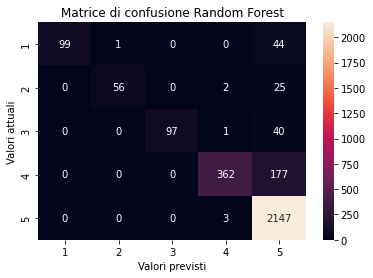

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

x_axis_labels = [1,2,3,4,5]
y_axis_labels = [1,2,3,4,5]

ax= plt.subplot()
sns.heatmap(array, annot=True, fmt='g', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels);  


ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 


ax.set_title('Matrice di confusione Random Forest'); 

In [ ]:
mean_squared_error(dftestl['labPol'], predizioneModelloRF , squared=False)

0.6471437420857592

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [ ]:
ModelloLogisticRegression = LogisticRegression()

ModelloLogisticRegression.fit(X_train_tfidf,y_train)

LogisticRegression()

In [ ]:
predizioneValModelloLogisticRegression = ModelloLogisticRegression.predict(X_test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di validation
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloLogisticRegression)


0.7142857142857143

In [ ]:
predizioneFinModelloLogisticRegression = ModelloLogisticRegression.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di test
from sklearn import metrics
metrics.accuracy_score(dftestl['labPol'], predizioneFinModelloLogisticRegression)


0.7396856581532416

In [ ]:
from sklearn.metrics import recall_score
#recall
recall_score(dftestl['labPol'], predizioneFinModelloLogisticRegression,  average='macro')


0.24772478077237575

In [ ]:
recall_score(dftestl['labPol'], predizioneFinModelloLogisticRegression,  average='micro')

0.7396856581532416

In [ ]:
from sklearn.metrics import precision_score
precision_score(dftestl['labPol'], predizioneFinModelloLogisticRegression,  average='micro')

0.7396856581532416

In [ ]:
 from sklearn.metrics import f1_score
#f1
f1_score(dftestl['labPol'], predizioneFinModelloLogisticRegression, average='macro')

0.2506875917201527

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
array=confusion_matrix(dftestl['labPol'], predizioneFinModelloLogisticRegression)
# (tn, fp, fn, tp)
array

array([[   5,    0,    0,    0,  139],
       [   0,    0,    0,    1,   82],
       [   0,    0,    1,    2,  135],
       [   0,    0,    0,  107,  432],
       [   0,    0,    0,    4, 2146]])

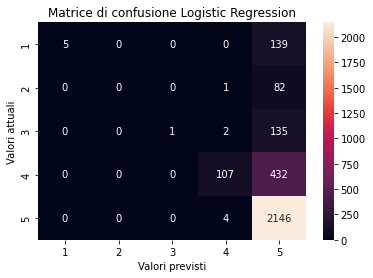

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

x_axis_labels = [1,2,3,4,5]
y_axis_labels = [1,2,3,4,5]

ax= plt.subplot()
sns.heatmap(array, annot=True, fmt='g', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels);  


ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 


ax.set_title('Matrice di confusione Logistic Regression'); 


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(dftestl['labPol'], predizioneFinModelloLogisticRegression , squared=False)

1.136407095674295

In [ ]:
 predizioneFinModelloLogisticRegression

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
df_1 = pd.DataFrame( predizioneFinModelloLogisticRegression)

In [ ]:
df = pd.concat([dftestl, df_1], axis=1)

In [ ]:
df = df.rename(columns={0: 'predizione'})


In [ ]:
df.head(20)

,text,labPol,labSen,predizione
0,"Ottimo prodotto di marca, la qualità é veramen...",5,1,5
1,Ottimo rasoio dal semplice utilizzo. Rade molt...,5,1,5
2,Un quarto delle dimensioni dello Show original...,5,1,5
3,Il prodotto si presenta esattamente come in fo...,5,1,5
4,"Superlativa, velocità in scrittura superiore a...",5,1,5
5,Prodotto ottimo e ottima anche la qualità prez...,5,1,5
6,Quello che cervavo ottimo,5,1,5
7,Un film sorprendente Una storia d’amore univer...,5,1,5
8,Il cellulare è arrivato nei tempi stabilite ed...,5,1,5
9,CON QUESTE CARTUCCE DI INDUBBIA OTTIMA QUALITA...,5,1,5


In [ ]:
#calcolo con naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
modelloNaiveBayes = MultinomialNB()


In [ ]:
modelloNaiveBayes = MultinomialNB()


In [ ]:
modelloNaiveBayes.fit(X_train_tfidf,y_train)

MultinomialNB()

In [ ]:
predizioneValModelloNB = modelloNaiveBayes.predict(X_test_tfidf)

In [ ]:
#sul sotto daset di validation
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloNB)

0.7123015873015873

In [ ]:
#sul database di test
predizioneValModelloFin = modelloNaiveBayes.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di test
from sklearn import metrics
metrics.accuracy_score(dftestl['labPol'], predizioneValModelloFin)

0.7039947609692206

In [ ]:
#calcolo recall NB
from sklearn.metrics import recall_score

recall_score(dftestl['labPol'],predizioneValModelloFin,  average='macro')

0.2

In [ ]:
from sklearn.metrics import precision_score
precision_score(dftestl['labPol'], predizioneValModelloFin,  average='micro')


0.7039947609692206

In [ ]:
 from sklearn.metrics import f1_score
#f1
f1_score(dftestl['labPol'], predizioneValModelloFin, average='macro')

0.16525749423520367

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
arrayNBmulti= multilabel_confusion_matrix(dftestl['labPol'], predizioneValModelloFin)


In [ ]:
arrayNBmulti= multilabel_confusion_matrix(dftestl['labPol'], predizioneValModelloFin)
arrayNBmulti[0]

array([[2910,    0],
       [ 144,    0]])

In [ ]:
arrayNBmulti= multilabel_confusion_matrix(dftestl['labPol'], predizioneValModelloFin)
arrayNBmulti[0]

array([[2910,    0],
       [ 144,    0]])

In [ ]:
arrayNBmulti

array([[[2910,    0],
        [ 144,    0]],

       [[2971,    0],
        [  83,    0]],

       [[2916,    0],
        [ 138,    0]],

       [[2515,    0],
        [ 539,    0]],

       [[   0,  904],
        [   0, 2150]]])

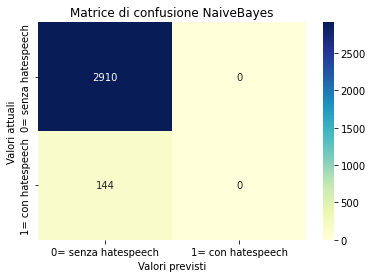

In [ ]:
ax= plt.subplot()
sns.heatmap(arrayNBmulti[0], cmap="YlGnBu", annot=True, fmt='g', ax=ax);  



ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 

ax.set_title('Matrice di confusione NaiveBayes'); 
ax.xaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']); ax.yaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']);

In [ ]:
arrayNB=confusion_matrix(dftestl['labPol'], predizioneValModelloFin)
# (tn, fp, fn, tp)
arrayNB

array([[   0,    0,    0,    0,  144],
       [   0,    0,    0,    0,   83],
       [   0,    0,    0,    0,  138],
       [   0,    0,    0,    0,  539],
       [   0,    0,    0,    0, 2150]])

In [ ]:
arrayNB.ravel()

array([   0,    0,    0,    0,  144,    0,    0,    0,    0,   83,    0,
          0,    0,    0,  138,    0,    0,    0,    0,  539,    0,    0,
          0,    0, 2150])

In [ ]:
tn, fp, fn, tp

(311, 8, 141, 40)

In [ ]:
tp

40

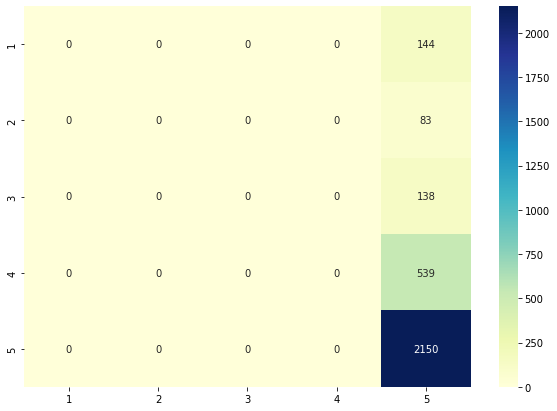

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(arrayNB, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap="YlGnBu", fmt='g', annot=True)


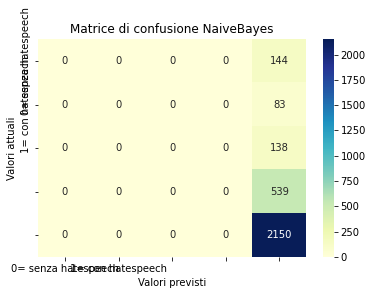

In [ ]:
ax= plt.subplot()
sns.heatmap(arrayNB, cmap="YlGnBu", annot=True, fmt='g', ax=ax);  



ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 




ax.set_title('Matrice di confusione NaiveBayes'); 
ax.xaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']); ax.yaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']);

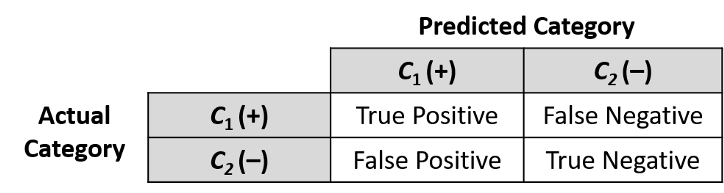

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(dftestl['labPol'], predizioneValModelloFin, squared=False)

1.1645832271644636